In [1]:
%load_ext autoreload
%autoreload 2
import os
import cv2
from PIL import Image
import torch
import albumentations as A
from albumentations.pytorch import ToTensorV2
from rich import print
from torch.nn import functional as F

from model_classify import ClassifyModel
from data_loader import random_seen_unseen_class_split

In [2]:
# dataset_path = os.path.expanduser("~/datasets2/reconcycle/2023-12-04_hcas_fire_alarms_sorted_cropped")
# seen_classes, _ = random_seen_unseen_class_split(dataset_path, seen_split=1.0)

# print("seen_classes", seen_classes)

In [3]:
model_path = "results/2023-12-11__12-05_classify/lightning_logs/version_0/checkpoints/epoch=544-step=544.ckpt"

model = ClassifyModel.load_from_checkpoint(model_path, strict=False)

print("model.learning_rate", model.learning_rate)
print("model.batch_size", model.batch_size)
print("model.freeze_backbone", model.freeze_backbone)
print("model.labels", model.labels)

/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


model.learning_rate 1e-05

model.batch_size 16

model.freeze_backbone False

model.labels
[
    'firealarm_back_01',
    'firealarm_back_02',
    'firealarm_back_03',
    'firealarm_back_04',
    'firealarm_back_05',
    'firealarm_back_06',
    'firealarm_back_07',
    'firealarm_back_08',
    'firealarm_back_09',
    'firealarm_back_10',
    'firealarm_back_11',
    'firealarm_back_12',
    'firealarm_back_13',
    'firealarm_back_14',
    'firealarm_back_15',
    'firealarm_front_01',
    'firealarm_front_02',
    'firealarm_front_03',
    'firealarm_front_04',
    'firealarm_front_05',
    'firealarm_front_06',
    'firealarm_front_07',
    'firealarm_front_08',
    'firealarm_front_09',
    'firealarm_front_10',
    'firealarm_front_11',
    'firealarm_front_12',
    'firealarm_front_13',
    'firealarm_front_14',
    'firealarm_front_15',
    'firealarm_inside_08',
    'hca_back_01',
    'hca_back_02',
    'hca_back_03',
    'hca_back_04',
    'hca_back_05',
    'hca_back_06',
    'hca_back_07',
    'hca_back_08',
    'hca_back_09',
    'hca_back_10',
    'hca_back_11',
    'hca_back_12',
    'hca_back_13',
    'hca_back_14',
    'hca_back_15',
    'hca_back_16',
    'hca_back_17',
    'hca_back_18',
    'hca_front_00',
    'hca_front_01',
    'hca_front_02',
    'hca_front_03',
    'hca_front_04',
    'hca_front_05',
    'hca_front_06',
    'hca_front_07',
    'hca_front_08',
    'hca_front_09',
    'hca_front_10',
    'hca_front_11',
    'hca_front_12',
    'hca_front_13',
    'hca_front_14'
]

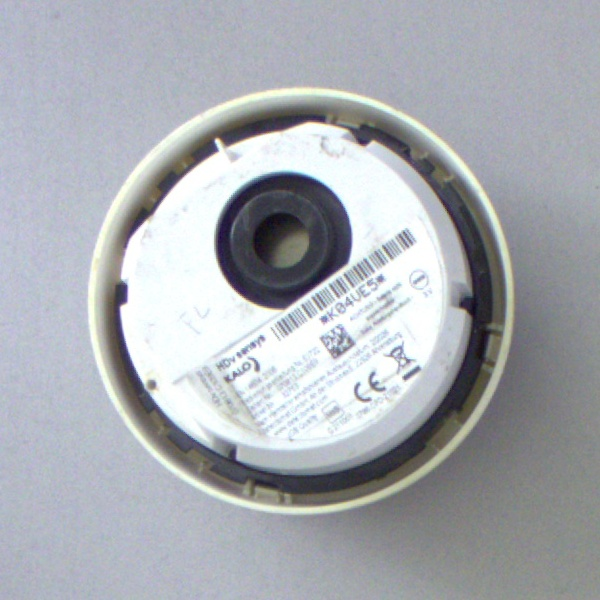

In [4]:
# get an image and run the model on it
img_path = os.path.expanduser("~/datasets2/reconcycle/2023-12-04_hcas_fire_alarms_sorted_cropped/firealarm_back_01/0069.jpg")
# img_path = os.path.expanduser("~/datasets2/reconcycle/2023-12-04_hcas_fire_alarms_sorted_cropped/firealarm_back_02/0042.jpg")
# img_path = os.path.expanduser("~/datasets2/reconcycle/2023-12-04_hcas_fire_alarms_sorted_cropped/firealarm_back_03/0101.jpg")

img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
display(Image.fromarray(img))

In [5]:
norm_mean = [0.485, 0.456, 0.406]
norm_std = [0.229, 0.224, 0.225]

transform = A.Compose([
        A.Resize(300, 300),
        A.Normalize(mean=norm_mean, std=norm_std),
        ToTensorV2()
])

img_tensor = transform(image=img)["image"]
img_tensor = img_tensor.unsqueeze(0).cuda() # batch size 1

print(img_tensor.shape)

model.eval()

with torch.no_grad():
        logits = model(img_tensor)
        print("logits", logits)

        preds = torch.argmax(logits, dim=1)
        print("preds", preds, logits[0][preds[0]])
        pred_label = model.labels[preds[0]]
        print("pred_label", pred_label)


torch.Size([1, 3, 300, 300])

logits tensor([[-2.6583e-03, -6.7652e+00, -9.4035e+00, -1.4664e+01, -1.1622e+01,
         -1.7512e+01, -9.5355e+00, -9.1124e+00, -1.2458e+01, -1.0394e+01,
         -9.1485e+00, -8.7619e+00, -1.0230e+01, -9.8642e+00, -1.3884e+01,
         -1.5893e+01, -1.4901e+01, -1.4123e+01, -1.5920e+01, -1.0028e+01,
         -1.0969e+01, -1.0498e+01, -1.3343e+01, -1.7144e+01, -1.4455e+01,
         -1.5551e+01, -1.3587e+01, -1.4692e+01, -1.3970e+01, -1.4814e+01,
         -7.6890e+00, -1.4875e+01, -1.0996e+01, -1.0665e+01, -9.2927e+00,
         -1.5866e+01, -1.0799e+01, -1.6912e+01, -1.3693e+01, -1.2303e+01,
         -1.5495e+01, -1.0326e+01, -1.2172e+01, -1.4099e+01, -1.7050e+01,
         -1.3636e+01, -1.1042e+01, -1.7302e+01, -1.0132e+01, -1.7119e+01,
         -1.7704e+01, -1.7279e+01, -1.6543e+01, -1.8815e+01, -1.5262e+01,
         -1.6269e+01, -1.0380e+01, -1.5856e+01, -1.6031e+01, -1.4937e+01,
         -1.7711e+01, -1.8507e+01, -1.4960e+01, -1.6889e+01]], device='cuda:0')

preds tensor([0], device='cuda:0') tensor(-0.0027, device='cuda:0')

pred_label firealarm_back_01